## Интеллектуальный анализ данных – весна 2022
## Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

###  Визуализация решающих поверхностей в kNN.

Изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


Ищем пропущенные значения. Ищем категориальные переменные.

In [4]:
X.isnull().any().any() #False - нет пропущенных данных
X.dtypes == 'object' #False - нет категориальных переменных

alcohol                         False
malic_acid                      False
ash                             False
alcalinity_of_ash               False
magnesium                       False
total_phenols                   False
flavanoids                      False
nonflavanoid_phenols            False
proanthocyanins                 False
color_intensity                 False
hue                             False
od280/od315_of_diluted_wines    False
proline                         False
dtype: bool

Используя  `train_test_split()`, делим выборку на тренировочную и тестовую, и долю тестовой выборки задаем равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте фиксруем `random_state=0` для воспроизводимости результатов.

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

На тренировочной выборке обучаем шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей ставим равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25. Для обучения используем только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Масштабируем признаки, например, при помощи модуля `StandardScaler`.

Выводим долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

acc_train = []
acc_test = []
d = {'train': np.array(acc_train), 'test': np.array(acc_test)}
acc = pd.DataFrame(data=d)

spisok_klassificatorov = []

normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train[['alcohol', 'magnesium']])
X_test_norm = normalizer.fit_transform(X_test[['alcohol', 'magnesium']])

num_neighb = [1, 3, 5, 10, 15, 25]
for i in range(6):
    neigh = KNeighborsClassifier(n_neighbors=num_neighb[i]).fit(X_train_norm, y_train)
    spisok_klassificatorov.append(neigh)
    acc_test.append(np.mean(y_test==neigh.predict(X_test_norm)))
    acc_train.append(np.mean(y_train==neigh.predict(X_train_norm)))
    
d = {'train': np.array(acc_train), 'test': np.array(acc_test), 'neighbors_n': num_neighb}
acc = pd.DataFrame(data=d)
acc

,train,test,neighbors_n
0,1.000000,0.666667,1
1,0.806452,0.722222,3
2,0.750000,0.685185,5
3,0.733871,0.703704,10
4,0.733871,0.814815,15
5,0.669355,0.814815,25


Устанавливаем библиотеку `mlxtend`.

In [7]:
!pip install mlxtend

In [8]:
import mlxtend

Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов.

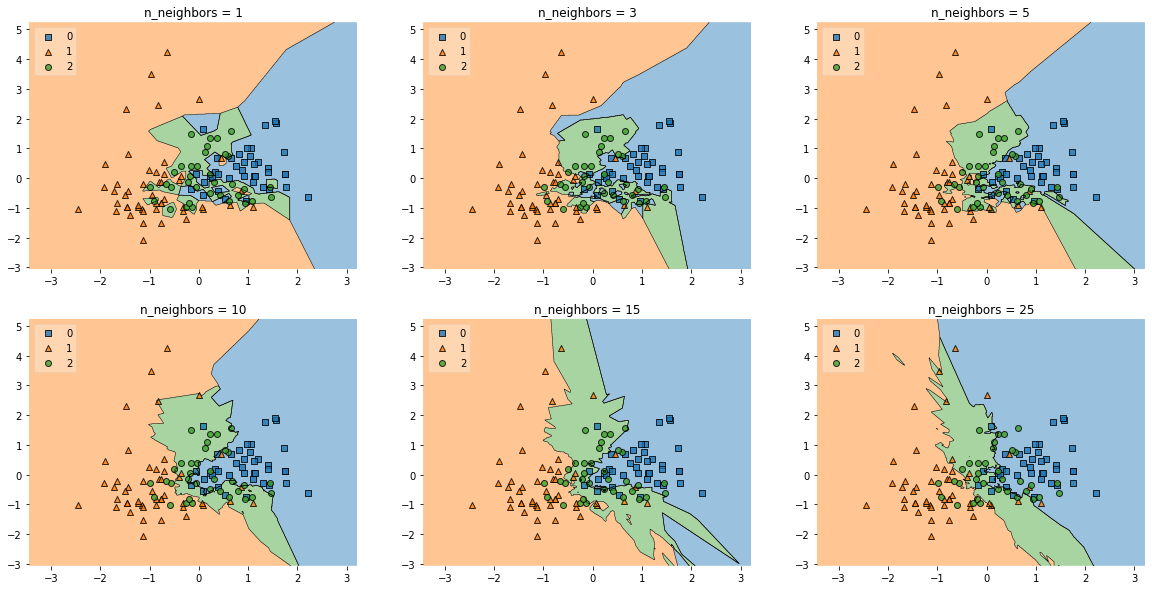

In [9]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
gs = gridspec.GridSpec(2, 3)

fig = plt.figure(figsize=(20,10))

labels = ['n_neighbors = 1', 'n_neighbors = 3', 'n_neighbors = 5', 'n_neighbors = 10', 'n_neighbors = 15', 'n_neighbors = 25']
for clf, lab, grd in zip(spisok_klassificatorov,
                         labels,
                         itertools.product([0, 1, 2], repeat=2)):

    
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train_norm, y=y_train, clf=clf, legend=2)
    plt.title(lab)

plt.show()

Оптимальным числом соседей является *n = 10*. Видно, что в данном случае удалось довольно аккуратно разделить поверхность по классам без каких-либо сильных перекосов, как в других примерах. Так же в других примерах решающие поверхности строятся довольно сложно, с выделением отдельных единичных объектов или пустых областей, чего не наблюдается в решении с 10 соседями.


### Линейная регрессия.

Здесь рассмотрим различные аспекты построения линейной модели. Будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [15]:
data = pd.read_csv('C:/Users/user/downloads/archive/diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

Ищем пропущенные значения

In [16]:
data.isna().any().any() #Нет пропущенных значений

False

**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [17]:
data = data.drop(columns=['Unnamed: 0']) #удаляю бесполезный столбец индексов
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**Задача 3.3 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [18]:
data.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


Больше всего с целевой переменной коррелируют признак _carat_ и размеры бриллиантов: _x, y, z_, что вполне логично

**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [19]:
X_data = data.drop(columns=['price'])
X_dum = pd.get_dummies(X_data, drop_first=True)
X_dum.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,3.95,3.98,2.43,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,3.89,3.84,2.31,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,4.05,4.07,2.31,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,4.20,4.23,2.63,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,4.34,4.35,2.75,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0


**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [20]:
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X_dum, y, test_size=0.3, random_state=0)

**Задача 3.6 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [21]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.fit_transform(X_test)

**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression().fit(X_train_norm, y_train)
print('mse_train :', mean_squared_error(y_train, lr.predict(X_train_norm)))
print('mse_test :', mean_squared_error(y_test, lr.predict(X_test_norm)))

mse_train : 1284661.8621191254
mse_test : 1258842.004080439


**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [23]:
abs_coef = np.abs(lr.coef_)
np.array(list(zip(abs_coef, X_data[['carat', 'depth', 'table', 'x', 'y', 'z']].columns)))

array([['5278.119983938963', 'carat'],
       ['94.26693610935311', 'depth'],
       ['65.61837226838472', 'table'],
       ['1050.0247597557172', 'x'],
       ['2.6473797066431106', 'y'],
       ['40.56862298889912', 'z']], dtype='<U32')

Оценки коэффициентов _carat_ и длины бриллианта _x_ значительно превышают оценки остальных переменных.

**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [24]:
from sklearn.linear_model import Lasso, Ridge

lr_lasso = Lasso(alpha=10).fit(X_train_norm, y_train)
lr_ridge = Ridge(alpha=10).fit(X_train_norm, y_train)


print('\n',lr_lasso.coef_)
print('\n',lr.coef_)
print('\n',lr_ridge.coef_)


 [4784.58223808 -100.46417419  -76.80709351 -603.5249138    -0.
  -40.09153589   32.15914057  184.43593078  128.3877937   120.81319164
   -0.          -24.42703051 -105.82444228 -267.91959723 -359.19659407
 -459.60473492  655.3063347   869.81778569  406.58029782 1046.99977323
 1103.88044864  846.4660105   963.06160789]

 [ 5.27811998e+03 -9.42669361e+01 -6.56183723e+01 -1.05002476e+03
 -2.64737971e+00 -4.05686230e+01  1.55923708e+02  3.89952109e+02
  3.14449843e+02  2.91047679e+02 -6.95800253e+01 -9.09479485e+01
 -1.82693620e+02 -3.39522613e+02 -4.30763476e+02 -5.17728075e+02
  9.57549314e+02  1.57320442e+03  1.01623724e+03  1.64046365e+03
  1.79084281e+03  1.26334765e+03  1.44548292e+03]

 [ 5.24003259e+03 -9.24621010e+01 -6.57910975e+01 -1.00868974e+03
 -4.49021066e+00 -4.40571340e+01  1.56659289e+02  3.91313955e+02
  3.15641410e+02  2.92535205e+02 -6.91760923e+01 -9.07485383e+01
 -1.82171492e+02 -3.38702374e+02 -4.29443100e+02 -5.16473294e+02
  9.45726951e+02  1.54418240e+03  9.915

Как видно веса изменились минимально, значит проблема мультиколлинеарности не проявляла себя в изначальной регрессии.

In [25]:
print('mse_train_ridge :', mean_squared_error(y_train, lr_ridge.predict(X_train_norm)))
print('mse_test_ridge :', mean_squared_error(y_test, lr_ridge.predict(X_test_norm)))
print('\n', 'mse_train_lasso :', mean_squared_error(y_train, lr_lasso.predict(X_train_norm)))
print('mse_train_lasso :', mean_squared_error(y_test, lr_lasso.predict(X_test_norm)))

mse_train_ridge : 1284783.3639957658
mse_test_ridge : 1259631.1621105536

 mse_train_lasso : 1343049.4702089047
mse_train_lasso : 1328171.8925970965


In [26]:
# mse в случае обыной регрессии
# mse_train : 1284661.8621191254
# mse_test : 1258842.004080439
# Видно, что с данным коэффициентом регуляризации положение не улучшилось, а в случае с lasso даже немного ухудшила.a

**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

Text(0, 0.5, 'norm of coef')

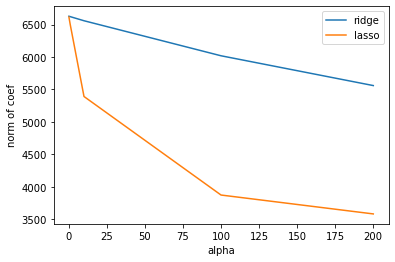

In [27]:
alpha = [0.1, 1, 10, 100, 200]
ridge_norm = []
lasso_norm = []


for i in alpha:
    ridge = Ridge(alpha = i)
    ridge.fit(X_train_norm, y_train)
    ridge.predict(X_test_norm)
    ridge_norm.append(np.linalg.norm(ridge.coef_))
    
    lasso = Lasso(alpha = i)
    lasso.fit(X_train_norm, y_train)
    lasso.predict(X_test_norm)
    lasso_norm.append(np.linalg.norm(lasso.coef_))

plt.plot(alpha, ridge_norm, label='ridge')
plt.plot(alpha, lasso_norm, label='lasso')
plt.legend()
plt.xlabel('alpha')
plt.ylabel('norm of coef')

Как видно _lasso_ регуляризация агрессивнее уменьшает веса.

**Задача 3.11 (0.5 балла)** 
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество. 

In [73]:
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(alphas=[0.1, 1, 10, 100, 200], cv=5).fit(X_train_norm, y_train)
print('R^2 :', lasso_cv.score(X_train_norm, y_train))
lasso_cv.predict(X_test_norm)
print(np.mean(lasso_cv.mse_path_, axis=0))
lasso_cv.alphas_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1139598866.6472015, tolerance: 48309472.87280813
  model = cd_fast.enet_coordinate_descent_gram(


R^2 : 0.9192273830053385
[1677746.11487135 1517648.0275343  1632985.11383348 1488652.3546197
 1570183.72483999]


array([2.e+02, 1.e+02, 1.e+01, 1.e+00, 1.e-01])

Несмотря на ошибку о том, что градиентный спуск не сошелся, коэффициент детерминации очень высокий, что может говорить о том, что модель неплохо обучилась. Наибольшее качество достигается при _alpha = 1_

**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [53]:
lasso = Lasso(alpha=1)
lasso.fit(X_train_norm, y_train)
lasso.coef_

array([ 5228.56086133,   -94.81899154,   -66.71608979, -1007.19846437,
          -0.        ,   -40.84217731,   143.62017829,   369.55250696,
         295.99492832,   274.12993973,   -62.50195326,   -84.22618828,
        -174.9291816 ,  -332.2982653 ,  -423.54470024,  -511.86764625,
         926.94240145,  1501.97936613,   954.50436151,  1580.37352146,
        1721.28955256,  1221.13867319,  1396.64080979])

Занулился признак _y_ - ширина бриллианта. Наиболее значимым является признак _carat_, что вполне логично. Так же значительный вклад в предсказание вносит признак _clarity_, его 'прозрачность'. Ширина не столь значима в предсказании, возможно, потому, что в бижутерии не часто используются широкие бриллианты, например потому, что кольцо с широким бриллиантом не удобно будет носить. Так же возможно, при добыче алмазов, широкие - не частое явление и поэтому они редко встречаются в магазинах.

**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [50]:
print('lasso_mse_test :', mean_squared_error(y_test, lasso.predict(X_test_norm)))


# mse_test : 1258842.004080439 обычная регрессия

lasso_mse_test : 1260899.7722159666


Немного лучше себя показала модель обычной линейной регрессии. Возможным объяснением может быть то, что изначально не стояла проблема переобучения и данные были 'в порядке'. Так же возможно не был найден коэффициент регуляризации при котором лассо показала бы себя лучше.

In [70]:
# mse_test : 1258842.004080439 обычная регрессия

lasso1 = Lasso(alpha=1e-10)
mean_squared_error(y_test, lasso1.fit(X_train_norm, y_train).predict(X_test_norm))

1258842.0040805896

При попытке найти коэффициент регуляризации, при котором модель показала бы себя лучше чем просто линейная, получилось только примерно сравнить их результаты. При дальнейшем уменьшении коэффициента ситуация не меняется.